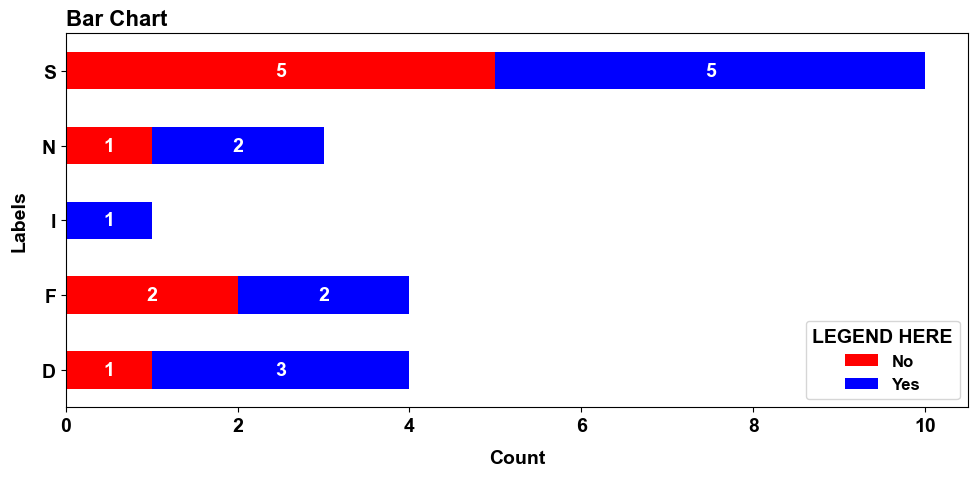

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Set global font settings
plt.rcParams.update({'font.family': 'Arial', 'font.size': 14, 'font.weight': 'bold'})

# Load data
df = pd.read_csv('bar_assignment.csv')
df['Response'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Group by label and response
counts = df.groupby(['LABEL', 'Response']).size().unstack(fill_value=0)
counts = counts[['No', 'Yes']]  # Ensures "No" (red) appears first

# Create stacked horizontal bar chart
ax = counts.plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(10, 5))

# Add labels inside bars
for index, (no, yes) in enumerate(zip(counts['No'], counts['Yes'])):
    if no > 0:
        plt.text(no / 2, index, str(no), ha='center', va='center', color='white', fontsize=14, fontweight='bold', fontfamily='Arial')
    if yes > 0:
        plt.text(no + yes / 2, index, str(yes), ha='center', va='center', color='white', fontsize=14, fontweight='bold')

# Add titles and labels
plt.title('Bar Chart', fontsize=16, fontweight='bold', loc='left')
plt.xlabel('Count', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Labels', fontsize=14, fontweight='bold', labelpad=10)

# Add legend
plt.legend(title='LEGEND HERE', loc='lower right', fontsize=12, title_fontsize=14)

# Disable grid for a cleaner look
plt.grid(False)

# Optimize layout and show plot
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv('sankey_assignment.csv')

sources = ['OMP', 'PS', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
labels = df['LABEL'].tolist()
targets = ['Reg', 'Aca', 'Oth']
nodes = sources + labels + targets

source_colors = {
    'OMP': 'rgba(31, 119, 180, 0.8)',  # Blue
    'PS': 'rgba(255, 127, 14, 0.8)',   # Orange
    'CNP': 'rgba(44, 160, 44, 0.8)',   # Green
    'NRP': 'rgba(214, 39, 40, 0.8)',   # Red
    'NMCCC': 'rgba(148, 103, 189, 0.8)', # Purple
    'PEC': 'rgba(140, 86, 75, 0.8)',   # Brown
    'NCDM': 'rgba(227, 119, 194, 0.8)', # Pink
    'RGS': 'rgba(127, 127, 127, 0.8)'  # Gray
}

label_colors = {label: f'rgba({(idx * 30) % 255}, {(idx * 50) % 255}, {(idx * 70) % 255}, 0.8)'
                for idx, label in enumerate(labels)}


target_colors = {
    'Reg': 'rgba(255, 99, 132, 0.8)',
    'Aca': 'rgba(54, 162, 235, 0.8)',
    'Oth': 'rgba(255, 206, 86, 0.8)'
}

# Assign colors to nodes
node_colors = (
    [source_colors[source] for source in sources] +
    [label_colors[label] for label in labels] +
    [target_colors[target] for target in targets]
)

# Prepare links and link colors
links = []
link_colors = []

for idx, row in df.iterrows():
    label = row['LABEL']
    label_idx = nodes.index(label)

    for source in sources:
        value = row[source]
        if value > 0:
            source_idx = nodes.index(source)
            links.append({
                'source': source_idx,
                'target': label_idx,
                'value': value
            })
            link_colors.append(source_colors[source])

    for target in targets:
        value = row[target]
        if value > 0:
            target_idx = nodes.index(target)
            links.append({
                'source': label_idx,
                'target': target_idx,
                'value': value
            })
            link_colors.append(label_colors[label]) 

fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        label=nodes,
        color=node_colors 
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color=link_colors 
    )
))

fig.update_layout(
    title_text="Sankey Diagram",
    font=dict(family="Arial", size=14)
)

fig.show()
